## Abstract

This lab is to represent how to find the gain from a telescope, the read noise in electrons, and the dark current values A and E. There are bias frames taken to reduce the noise in each part of the time interval frames and the dark temperature frames. With the values gained from the read noise, variance of the signal, and the dark current, they can then be plotted against time to find the gain and the dark current against temperature, which will give the values for A and $E_g$. The gain can be measured by the slope of the line of the variance vs the mean. The values of A and $E_g$ can be measured through a regression analysis of the curve created by the dark current and the temperature.

## Introduction

This experiment is based on the Angell Hall Telescope with a silicon CCD inside. This CCD is an electronic detector that has a few sound to noise problems that are found further on in this experiment. Here, a way to find the gain and the dark current constant and the bandgap. These are found through the poisson statistics to find the read noise and the signal to noise. With these values the gain can be found and thus part of the sound to noise ratio of this CCD can be found. Then the dark current constant and the bandgap can be found through the dark current equation. 

This experiment also goes over the frequentist statistical theory, which helps determine the poisson of the time interval frames and the dark current constant and bandgap. This is through the mean of these frames and the standard deviation found through these statistics. By repeating the process over different time intervals, the probability of the gain can be found and the dark current constant and the bandgap. 

## Theory

There are a few equations that have been used to calculate the read noise in ADU, the sigma (standard deviation), the gain, the variance or signal in ADU, and how to calculate the values of the dark current. 

The read noise is the typical noise that all telescopes have as ethe charge from the electrons creates a noise. With the read noise in ADU found and the variance, the gain can be calculated by the poisson distribution:

$\sigma_N = \sqrt{N_e} $

$\sigma_N^2 = N_e $

The Read noise in electrons is also given by this equation:

$N_e = g * N_{ADU} $

$\sigma_N^2 = g * N_{ADU} $

Thus the gain can be solved for by:

$ g = \frac{\sigma_N^2}{N_{ADU}} $ 

As we have the sigma of the read noise (the standard deviation), and the read noise (the mean of the time interval), thus the gain can then be calculated based on the poisson function above.

The read noise in electrons can then be calculated, such that:

$g * N_{ADU} = N_e $

Which shows the read noise per the time interval.

The dark current comes from the heating of the silicon lattice in the telescope. The dark current is then calculated through:

$ N_{d,ADU} = A * T^{3/2} * exp^{\frac{-E_g}{2*k*T}} $

The values of A and $E_g$ can then be found the a regression analysis of the function, based off of the $N_{d,ADU}$ which is the mean of the noise from the dark current. With the temperature already calculated, all that is left is to find A and $E_g$. Thus with $E_g$ is the band-gap for the silicon, and A is the dark current constant.

## Experiment and Methodology

In [1215]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
import scipy as sp

This cell code is to calculate the bias from the zero length time exposures. These no light frames are used to reduce the noise that is to be calculated for the read noise. The mean value for each frame is not the same, although each of them are very similar in means. 

In [1216]:
bias = []
for i in range(1,21,1):
    bias.append(fits.getdata("gains.0000000{}.fit".format(i) , ext=0).astype(np.int))
    avbias = sum(bias)/19   
print ('Average Bias Mean: ', avbias.mean())
print ("Two bias frames subtracted from each other: ", bias[0].mean()-bias[1].mean())
Bias_std = ((bias[0].std() + bias[1].std() + bias[2].std() + bias[3].std() + bias[4].std() + bias[5].std() + bias[6].std() + bias[7].std() + bias[8].std() + bias[9].std() + bias[10].std() + bias[11].std() + bias[12].std() + bias[13].std() + bias[14].std() + bias[15].std() + bias[16].std() + bias[17].std() + bias[18].std())/19)
print ('Sigma for Bias: ', Bias_std)

Average Bias Mean:  12312.2852803
Two bias frames subtracted from each other:  21.5538290788
Sigma for Bias:  100.572503429


Below, the calculations for each seperate means in each time intervals of 0.2, 0.4, 0.6, 0.8 and 1.0 seconds. The average mean of the bias is then subtracted from the mean of the average time interval. Then the $\sigma$ for the time interval is created by adding all the standard deviations for the frames within the time interval and divided to get an average $\sigma$ of the total time interval. The variance (signal in ADU) is then found by squaring the $\sigma$. This can then lead to the gain being found by the variance divided by the mean. These different light levels show a linear relationship for the gain. From lab 2, the measurement of the mean and the variance the similar to the mean (read noise in ADU) and the variance (the signal in ADU). The mean values are not the same everywhere for these time intervals, as each pixel has a different amount of light exposure in each time frame. This is different than why the bias frames have different mean values at certain pixel locations.

In [1217]:
Ti1 = []
for i in range(21,26,1):
    Ti1.append(fits.getdata("gains.000000{}.fit".format(i) , ext=0).astype(np.int))
    avTi1 = sum(Ti1)/4
N1 = avTi1.mean() - avbias.mean()
print ('Average Mean for 0.2 s: ',N1)
Ti1_std = (((Ti1[0].std() + Ti1[1].std() + Ti1[2].std() + Ti1[3].std() + Ti1[4].std())/5) - Bias_std)
print ('Sigma for 0.2 s: ', Ti1_std)
Var1 = (Ti1_std)**2
print ('Signal in ADU for 0.2 s: ', Var1)

Ti2 = []
for i in range(26,31):
    Ti2.append(fits.getdata("gains.000000{}.fit".format(i) , ext=0).astype(np.int))
    avTi2 = sum(Ti2)/4
N2 = avTi2.mean() - avbias.mean()
print ('Average Mean for 0.4 s: ',N2)
Ti2_std = (((Ti2[0].std() + Ti2[1].std() + Ti2[2].std() + Ti2[3].std() + Ti2[4].std())/5) - Bias_std)
print ('Sigma for 0.4 s: ', Ti2_std)
Var2 = (Ti2_std)**2
print ('Signal in ADU for 0.4 s: ', Var2)

Ti3 = []
for i in range(31,36):
    Ti3.append(fits.getdata("gains.000000{}.fit".format(i) , ext=0).astype(np.int))
    avTi3 = sum(Ti3)/4
N3 = avTi3.mean() - avbias.mean()
print ('Average Mean for 0.6 s: ', avTi3.mean() - avbias.mean())
Ti3_std = (((Ti3[0].std() + Ti3[1].std() + Ti3[2].std() + Ti3[3].std() + Ti3[4].std())/5) - Bias_std)
print ('Sigma for 0.6 s: ', Ti3_std)
Var3 = (Ti3_std)**2
print ('Signal in ADU for 0.6 s: ',Var3)

Ti4 = []
for i in range(36,41):
    Ti4.append(fits.getdata("gains.000000{}.fit".format(i) , ext=0).astype(np.int))
    avTi4 = sum(Ti4)/4
N4 = avTi4.mean() - avbias.mean()
print ('Average Mean of 0.8 s: ',N4)
Ti4_std = (((Ti4[0].std() + Ti4[1].std() + Ti4[2].std() + Ti4[3].std() + Ti4[4].std())/5) - Bias_std)
print ('Sigma for 0.8 s: ', Ti4_std)
Var4 = (Ti4_std)**2
print ('Signal in ADU for 0.8 s: ',Var4)

Ti5 = []
for i in range(41,46):
    Ti5.append(fits.getdata("gains.000000{}.fit".format(i) , ext=0).astype(np.int))
    avTi5 = sum(Ti5)/4
N5 = avTi5.mean() - avbias.mean()
print ('Average Mean for 1 s: ', N5)
Ti5_std = (((Ti5[0].std() + Ti5[1].std() + Ti5[2].std() + Ti5[3].std() + Ti5[4].std())/6) - Bias_std)
print ('Sigma for 1 s: ', Ti5_std)
Var5 = (Ti5_std)**2
print ('Signal in ADU for 1 s: ', Var5)

Average Mean for 0.2 s:  5723.82087155
Sigma for 0.2 s:  28.46422411
Signal in ADU for 0.2 s:  810.212054186
Average Mean for 0.4 s:  14151.2079415
Sigma for 0.4 s:  86.6492555373
Signal in ADU for 0.4 s:  7508.09348517
Average Mean for 0.6 s:  22435.0773326
Sigma for 0.6 s:  135.605229909
Signal in ADU for 0.6 s:  18388.7783786
Average Mean of 0.8 s:  30689.558544
Sigma for 0.8 s:  179.483694739
Signal in ADU for 0.8 s:  32214.396677
Average Mean for 1 s:  38484.0161704
Sigma for 1 s:  212.709987081
Signal in ADU for 1 s:  45245.5386039


Here the gain is calculated for each time interval, where the actual gain for the linearity is found through an average of the 5 gains. 

In [1218]:
g1 = Var1/N1
g2 = Var2/N2
g3 = Var3/N3
g4 = Var4/N4
g5 = Var5/N5
g = (g1 + g2 + g3 + g4 + g5)/5
print (g)

0.743427961918


The set up for the following plots for the x and y axis's are given before in arrays.

In [1219]:
N = [N1,N2,N3,N4,N5]
V = [Var1,Var2,Var3,Var4,Var5]
itime = [0.2,0.4,0.6,0.8,1.0]

The first plot is of the Time vs the Signal in ADU, which shows whether there are any particular problems with the variance. This shows some of the linearity for the gain.

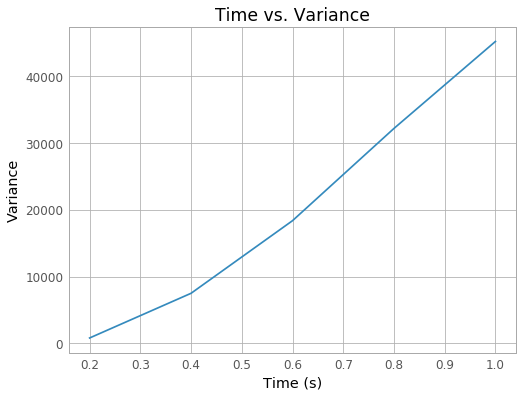

In [1220]:
plt.plot(itime,V)
plt.title("Time vs. Variance")
plt.xlabel("Time (s)")
plt.ylabel("Variance")

The following plot is of the mean (Read noise in ADU) vs Variance (Signal in ADU). This plot in the beginning is not linear, but as it continues on, it grows in linearity, thus creating a gain value.

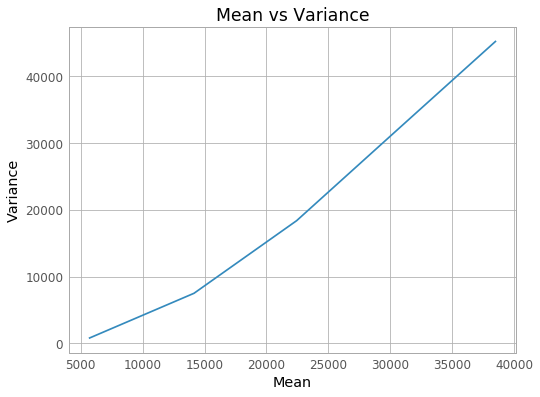

In [1221]:
plt.plot(N,V)
plt.title("Mean vs Variance")
plt.xlabel("Mean")
plt.ylabel("Variance")

The read noise can then be calculated with the gain times the read noise (in ADU) of each time interval frame.

In [1222]:
Readnoise1 = g * N1
print ('Read noise for 0.2 s: ', Readnoise1)
Readnoise2 = g * N2
print ('Read noise for 0.4 s: ', Readnoise2)
Readnoise3 = g * N3
print ('Read noise for 0.6 s: ', Readnoise3)
Readnoise4 = g * N4
print ('Read noise for 0.8 s: ', Readnoise4)
Readnoise5 = g * N5
print ('Read noise for 1.0 s: ', Readnoise5)

Read noise for 0.2 s:  4255.24848492
Read noise for 0.4 s:  10520.4036786
Read noise for 0.6 s:  16678.8638169
Read noise for 0.8 s:  22815.4759605
Read noise for 1.0 s:  28610.093708


Here the calculations of the bias frame per temperature and the mean of the dark frames at different temperatures are caluclated. The mean of the bias at the temperatures are subtracted from the mean of the dark frame. The temperatures are $-13^\circ$, $-10^\circ$, $-7^\circ$, $-4^\circ$, and $-1^\circ$ in celsius.

In [1223]:
bias13 = []
for i in range(1,10,1):
    bias13.append(fits.getdata("bias13.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
    avbias13 = sum(bias13)/9
print ("average bias at -13': ", avbias13.mean())

dark13 = []
for i in range(1,3,1):
    dark13.append(fits.getdata("dark13.0000000{}.HIP 79622.Dark.fit".format(1) , ext=0).astype(np.int))
    avdark13 = sum(dark13)/2
N13 = avdark13.mean() - avbias13.mean()
print ("dark noise at -13': ", N13)

bias10 = []
for i in range(1,10,1):
    bias10.append(fits.getdata("bias10.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
    avbias10 = sum(bias10)/9
print ("average bias at -10': ", avbias10.mean())

dark10 = []
for i in range(1,3,1):
    dark10.append(fits.getdata("dark10.0000000{}.HIP 79622.Dark.fit".format(1) , ext=0).astype(np.int))
    avdark10 = sum(dark10)/2
N10 = avdark10.mean() - avbias10.mean()
print ("dark noise at -10': ", N10)

bias7 = []
for i in range(1,10,1):
    bias7.append(fits.getdata("bias7.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
    avbias7 = sum(bias7)/9
print ("average bias at -7': ", avbias7.mean())

dark7 = []
for i in range(1,3,1):
    dark7.append(fits.getdata("dark7.0000000{}.HIP 79622.Dark.fit".format(1) , ext=0).astype(np.int))
    avdark7 = sum(dark7)/2
N7 = avdark7.mean() - avbias7.mean()
print ("dark noise at -7': ", N7)

bias4 = []
for i in range(1,10,1):
    bias4.append(fits.getdata("bias4.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
    avbias4 = sum(bias4)/9
print ("average bias at -4': ", avbias4.mean())

dark4 = []
for i in range(1,3,1):
    dark4.append(fits.getdata("dark4.0000000{}.HIP 79622.Dark.fit".format(1) , ext=0).astype(np.int))
    avdark4 = sum(dark4)/2
N4 = avdark4.mean() - avbias4.mean()
print ("dark noise at -4': ", N4)

bias1 = []
for i in range(1,10,1):
    bias1.append(fits.getdata("bias1.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
    avbias1 = sum(bias1)/9
print ("average bias at -1': ", avbias1.mean())

dark1 = []
for i in range(1,3,1):
    dark1.append(fits.getdata("dark1.0000000{}.HIP 79622.Dark.fit".format(1) , ext=0).astype(np.int))
    avdark1 = sum(dark1)/2
N1 = avdark1.mean() - avbias1.mean()
print ("dark noise at -1': ", N1)

average bias at -13':  7697.47472826
dark noise at -13':  187.754223702
average bias at -10':  7696.82305375
dark noise at -10':  234.530680197
average bias at -7':  7691.88976974
dark noise at -7':  300.139404189
average bias at -4':  7690.61275831
dark noise at -4':  380.667565139
average bias at -1':  7686.17736906
dark noise at -1':  498.744622377


The dark current above then shows how as the temperature grows, the dark current grows, thus the Angell Hall telescope will have a slightly significant dark current based on the calculations above. The following code is to create 2 plots, one for the dark current against the temperatures. This graph presents a exponential function, which shows can be shown through the function $AT^{3/2}exp(\frac{-E_g}{2kT})$ with 2 unknown constants. These constants are then found in the following graph of a regression analysis. The calculated values of A is shown as 'a' in the following code, and 'b' is E in the code. The plot shows the red approximation of the regression, and the blue line is the dark current vs the temperature. The $E_g$ for silicon is approximately 1.1 eV/K. The results give A approximately as ~1. 

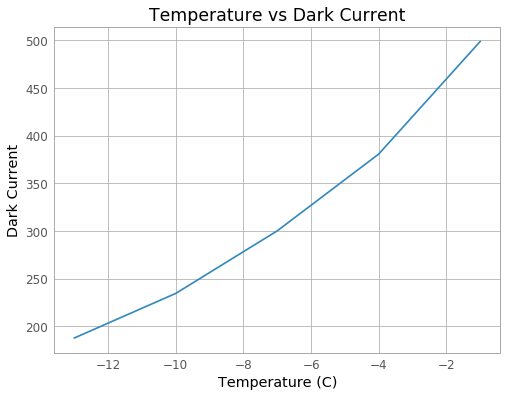

a=5.9519259013, b=1.05119522175


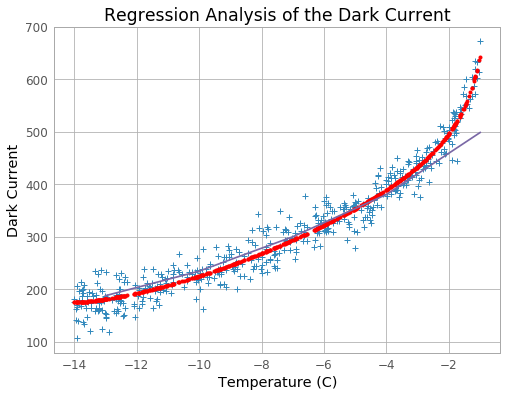

In [1224]:
Ndark = [N13,N10,N7,N4,N1]
T = [-13,-10,-7,-4,-1]
plt.plot(T,Ndark)
plt.title("Temperature vs Dark Current")
plt.xlabel("Temperature (C)")
plt.ylabel("Dark Current")
plt.show()

a,b = (6.05,1)
def func0 (x,a,b):
    return a*(x+14)**(3/2)*np.exp(-b/(2*x))+175

xmin,xmax = (-14,-1)
N = 500
xvals = np.random.uniform(xmin, xmax, N)
yvals0 = func0(xvals,a,b)

sig = 25.0
err = sig * np.random.standard_normal(N)
yvals = yvals0 + err

from scipy.optimize import curve_fit 
def func (x,a,b):
    return a*(x+14)**(3/2)*np.exp(-b/(2*x))+175

a0,b0 = (0.5,0.5)
at,bt = (6.05,1)
coeffs, fiterr = curve_fit(func, xvals, yvals, p0=(at,bt))
print ("a=%s, b=%s" % (coeffs[0], coeffs[1]))
plt.plot(xvals,yvals, '+')
plt.plot(xvals,func(xvals,*coeffs),'r.', T, Ndark)
plt.title("Regression Analysis of the Dark Current")
plt.xlabel("Temperature (C)")
plt.ylabel("Dark Current")
plt.show()

The read-noise, gain, linearity, and dark current of the Angell Hall CCD to the professional MDM4K is not as great. The gain is worse for our CCD, as theirs is approximately 2.2-2.4 electrons per ADU. The linearity for the MDM4K is linear up to 45,000 ADU. Since the data from the Angell Hall CCD is calculated with a temperature of $-14^\circ$, the MDM4K is operating at a temperature of $-124^\circ$, which would cause for a significantly less dark current.

## Summary

The Read noise, gain, linearity of the gain and the dark current constants A and $E_g$. First the bias frame mean and sigma of the bias frame is found. Once found, the mean and standard deviation of the read noise in ADU is found, the bias frame mean and sigma is subtracted from it. The values of the standard deviation per time interval is then squared to find the the variance or signal of the read noise. This can then be graphed as a mean-variance graph, which can show a linearity to find the gain value as the slope of that line. Once that is done, the gain can be multiplied by the read noise in ADU (the mean) and the read noise can be found in electrons.

The dark current is then found through find the mean of the bias frames at each temperature, and then subtracting it from the mean of the dark frames taken at certain temperatures. Once found, a graph of the Temperature vs the Dark Current, which shows an exponential function. This then is found through a regression analysis, which can find the values of A and $E_g$. 

## Conclusion

In the end, the gain is then calculated through the variance divided by the mean, which the average of the time interval gains give ~0.74. The gain is almost accurate in value, although it is slightly greater in the ending value of the gain for 1 second than it should be. The dark current constant and the band gap are also found through the estimation of the regression analysis. This estimation gives a close value of an increase in +6 per each raise in temperature for the dark current constant, and the $E_g$ is approximately 1, which is close to the actually value of silicon band gap of 1.1 eV/K.